# Lista 7
## Jakub Ciągło (275986), Mateusz Ćwiek (276011)

___
## Importy

In [11]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

___
## Zadanie 1

In [12]:
# 1. Tworzenie tensorów
tensor_a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
tensor_b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print("\nTensor A:\n", tensor_a)
print("Tensor B:\n", tensor_b)

# 2. Podstawowe operacje
# Dodawanie
sum_t = tensor_a + tensor_b
print("\nSuma (A + B):\n", sum_t)

# Mnożenie (element po elemencie)
mul_t = tensor_a * tensor_b
print("Mnożenie element po elemencie (A * B):\n", mul_t)

# Mnożenie macierzowe (iloczyn skalarny)
matmul_t = torch.matmul(tensor_a, tensor_b)
print("Mnożenie macierzowe (A @ B):\n", matmul_t)

# Transpozycja
trans_t = tensor_a.t()
print("Transpozycja Tensora A:\n", trans_t)


Tensor A:
 tensor([[1., 2.],
        [3., 4.]])
Tensor B:
 tensor([[5., 6.],
        [7., 8.]])

Suma (A + B):
 tensor([[ 6.,  8.],
        [10., 12.]])
Mnożenie element po elemencie (A * B):
 tensor([[ 5., 12.],
        [21., 32.]])
Mnożenie macierzowe (A @ B):
 tensor([[19., 22.],
        [43., 50.]])
Transpozycja Tensora A:
 tensor([[1., 3.],
        [2., 4.]])


___
## Zadanie 2

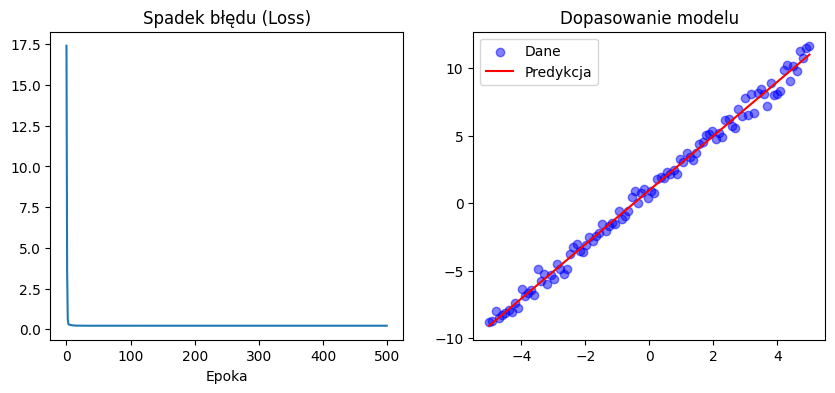

In [13]:
# Generowanie danych syntetycznych: y = 2x + 1 + szum
X = torch.linspace(-5, 5, 100).view(-1, 1) # view zmienia kształt na [100, 1]
y = 2 * X + 1 + 0.5 * torch.randn(X.size())

# Definicja prostej sieci: Wejście -> Ukryta -> Wyjście
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        # Warstwa ukryta (1 wejście -> 10 neuronów)
        self.hidden = nn.Linear(1, 10) 
        # Warstwa wyjściowa (10 neuronów -> 1 wyjście)
        self.output = nn.Linear(10, 1) 

    def forward(self, x):
        # Tutaj na razie bez nieliniowości, żeby pokazać sam przepływ
        x = self.hidden(x)
        x = self.output(x)
        return x

model = SimpleNet()

# Funkcja straty (MSE) i optymalizator (SGD)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Pętla uczenia
epochs = 500
losses = []

for epoch in range(epochs):
    # 1. Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    
    # 2. Backward pass
    optimizer.zero_grad() # Zerowanie gradientów
    loss.backward()       # Obliczanie gradientów
    optimizer.step()      # Aktualizacja wag

# Wizualizacja wyniku
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Spadek błędu (Loss)")
plt.xlabel("Epoka")

plt.subplot(1, 2, 2)
plt.scatter(X.numpy(), y.numpy(), label='Dane', color='blue', alpha=0.5)
plt.plot(X.numpy(), model(X).detach().numpy(), label='Predykcja', color='red')
plt.title("Dopasowanie modelu")
plt.legend()
plt.show()

___
## Zadanie 3

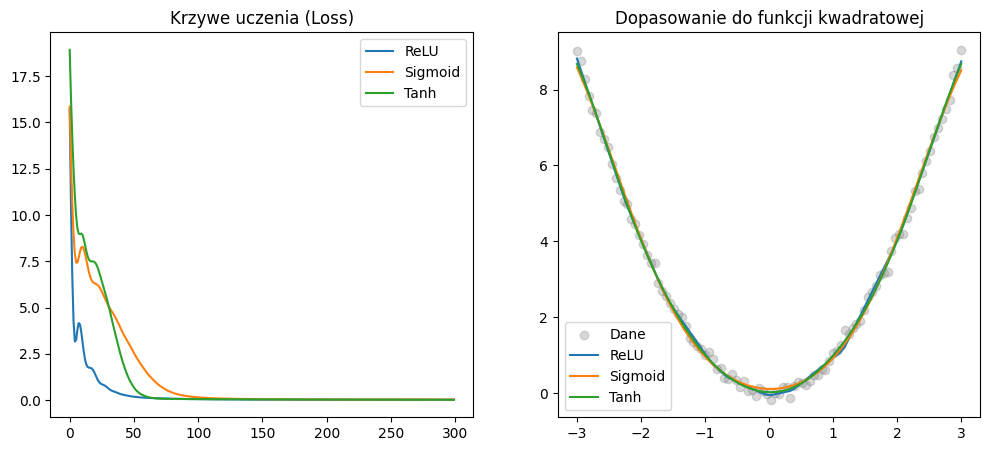

In [14]:
X_nl = torch.linspace(-3, 3, 100).view(-1, 1)
y_nl = X_nl.pow(2) + 0.1 * torch.randn(X_nl.size())

def train_model(activation_fn, name):
    model = nn.Sequential(
        nn.Linear(1, 20),
        activation_fn(),  # Różna funkcja aktywacji
        nn.Linear(20, 1)
    )
    optimizer = optim.Adam(model.parameters(), lr=0.05)
    loss_fn = nn.MSELoss()
    
    losses = []
    for _ in range(300):
        y_pred = model(X_nl)
        loss = loss_fn(y_pred, y_nl)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    return losses, model(X_nl).detach()

loss_relu, pred_relu = train_model(nn.ReLU, "ReLU")
loss_sig, pred_sig = train_model(nn.Sigmoid, "Sigmoid")
loss_tanh, pred_tanh = train_model(nn.Tanh, "Tanh")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_relu, label='ReLU')
plt.plot(loss_sig, label='Sigmoid')
plt.plot(loss_tanh, label='Tanh')
plt.title('Krzywe uczenia (Loss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_nl, y_nl, color='gray', alpha=0.3, label='Dane')
plt.plot(X_nl, pred_relu, label='ReLU')
plt.plot(X_nl, pred_sig, label='Sigmoid')
plt.plot(X_nl, pred_tanh, label='Tanh')
plt.title('Dopasowanie do funkcji kwadratowej')
plt.legend()
plt.show()

___
## Zadanie 4

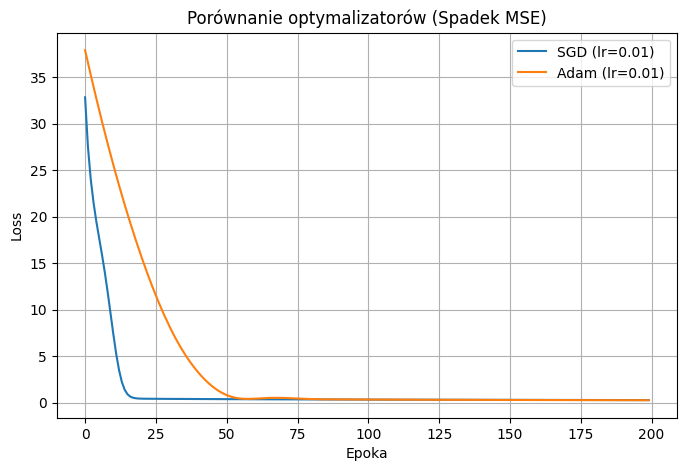

In [19]:
X = torch.linspace(-5, 5, 100).view(-1, 1)
y = 2 * X + 1 + 0.5 * torch.randn(X.size())

def train_optimizer(opt_class, lr, name):
    model = nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 1))
    # MSE Loss dla regresji
    criterion = nn.MSELoss()
    optimizer = opt_class(model.parameters(), lr=lr)
    
    losses = []
    for _ in range(200):
        y_pred = model(X)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

loss_sgd = train_optimizer(optim.SGD, 0.01, "SGD")
loss_adam = train_optimizer(optim.Adam, 0.01, "Adam")

plt.figure(figsize=(8, 5))
plt.plot(loss_sgd, label='SGD (lr=0.01)')
plt.plot(loss_adam, label='Adam (lr=0.01)')
plt.title('Porównanie optymalizatorów (Spadek MSE)') # [cite: 4251]
plt.xlabel('Epoka')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

___
## Zadanie 5

In [16]:
data = load_breast_cancer()
X, y = data.data, data.target

# Podział i skalowanie (kluczowe dla sieci neuronowych!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konwersja do tensorów
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.FloatTensor(y_train).view(-1, 1)
X_test_t = torch.FloatTensor(X_test)
y_test_t = torch.FloatTensor(y_test).view(-1, 1)

# 2. Budowa modelu
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 16)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(16, 1)
        self.output_act = nn.Sigmoid() # [cite: 4253]

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.output_act(self.layer2(x))
        return x

model = BinaryClassifier(X_train.shape[1])
criterion = nn.BCELoss() # Binary Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 3. Trening
for epoch in range(100):
    y_pred = model(X_train_t)
    loss = criterion(y_pred, y_train_t)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 4. Ewaluacja
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t)
    # Zamiana prawdopodobieństw na klasy (0 lub 1)
    y_pred_cls = (y_pred_test > 0.5).float()
    acc = accuracy_score(y_test_t, y_pred_cls)
    print(f"Dokładność na zbiorze testowym: {acc:.4f}")

Dokładność na zbiorze testowym: 0.9825


___
## Zadanie 6

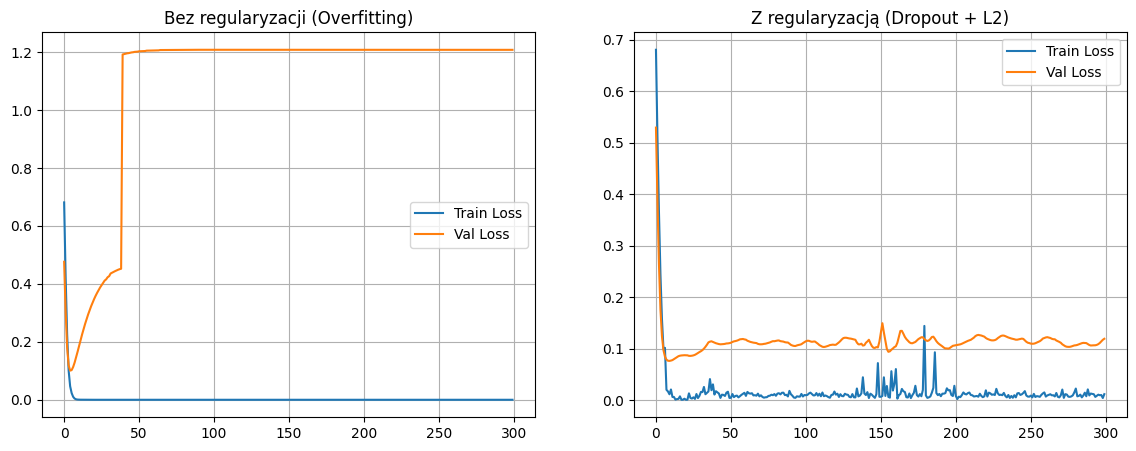

In [17]:
# (bierzemy tylko 30 próbek z Breast Cancer)
X_tiny = X_train_t[:30]
y_tiny = y_train_t[:30]
# Walidacyjny zostawiamy duży, żeby widzieć błąd
X_val = X_test_t
y_val = y_test_t

# Model podatny na overfitting (dużo neuronów)
class OverfitNet(nn.Module):
    def __init__(self, input_dim, use_dropout=False):
        super(OverfitNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 100) # Duża warstwa
        self.fc2 = nn.Linear(100, 100)       # Duża warstwa
        self.fc3 = nn.Linear(100, 1)
        self.dropout = nn.Dropout(0.5)       # Dropout 50%
        self.use_dropout = use_dropout
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        if self.use_dropout: x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        if self.use_dropout: x = self.dropout(x)
        x = self.sig(self.fc3(x))
        return x

def run_experiment(use_reg, name):
    model = OverfitNet(X_tiny.shape[1], use_dropout=use_reg)
    # L2 regularization jest w PyTorch realizowana przez parametr weight_decay w optymalizatorze
    weight_decay = 1e-2 if use_reg else 0.0 
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)
    criterion = nn.BCELoss()
    
    train_losses, val_losses = [], []
    
    for epoch in range(300):
        model.train()
        pred = model(X_tiny)
        loss = criterion(pred, y_tiny)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())
            
    return train_losses, val_losses

# Uruchomienie eksperymentów
t_loss_base, v_loss_base = run_experiment(False, "Bez regularyzacji")
t_loss_reg, v_loss_reg = run_experiment(True, "Z regularyzacją (Dropout + L2)")

# Porównanie krzywych [cite: 4256]
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(t_loss_base, label='Train Loss')
plt.plot(v_loss_base, label='Val Loss')
plt.title('Bez regularyzacji (Overfitting)')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t_loss_reg, label='Train Loss')
plt.plot(v_loss_reg, label='Val Loss')
plt.title('Z regularyzacją (Dropout + L2)')
plt.legend()
plt.grid()

plt.show()